In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def basic(S, I, R, beta, gamma):
    N = S + I + R
    S = S - beta*((S*I)/N)
    I = I + beta*((S*I)/N) - gamma*I
    R = R + gamma*I
    return S, I, R

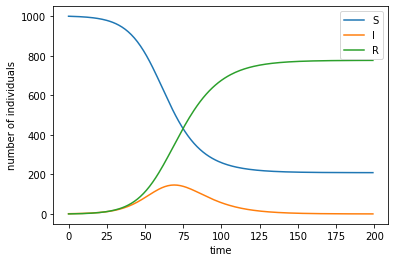

In [4]:
S = 1000
I = 1
R = 0
beta = 0.2
gamma = 0.1
steps = 200

basicdata = []

for _ in range(steps):
  S, I, R = basic(S, I, R, beta, gamma)
  basicdata.append([S, I, R])

plt.plot(basicdata)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R'))
plt.show()

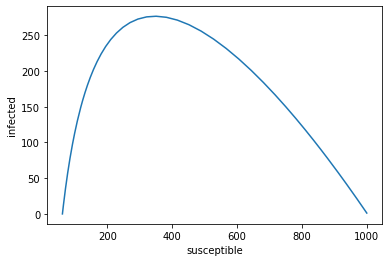

In [24]:
S = 1000
I = 1
R = 0
beta = 0.3
gamma = 0.1
steps = 200

basics = []
basici = []

for _ in range(steps):
  S, I, R = basic(S, I, R, beta, gamma)
  basics.append([S])
  basici.append([I])

plt.plot(basics, basici)
plt.xlabel('susceptible')
plt.ylabel('infected')

plt.show()

In [3]:
def lockdown(S, I, R, beta, gamma, u):
    N = S + I + R
    S = S - u*beta*((S*I)/N)
    I = I + u*beta*((S*I)/N) - gamma*I
    R = R + gamma*I
    return S, I, R

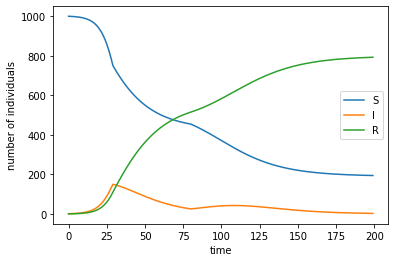

In [59]:
S = 1000
I = 1
R = 0
beta = 0.3
gamma = 0.1
steps = 200
lockdownstart = 30
lockdowntime = 50
lockdownstrength = 0.4

lockdowndata = []


for i in range(steps):
  if i < lockdownstart:
    u = 1
  else:
    if i > lockdownstart + lockdowntime:
      u = 1
    else:
      u = lockdownstrength
  udata.append([u])
  S, I, R = lockdown(S, I, R, beta, gamma, u)
  lockdowndata.append([S, I, R])

plt.plot(lockdowndata)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R'))
plt.show()

In [4]:
def vaccination(S, I, R, beta, gamma, v):
    N = S + I + R
    S = S - beta*((S*I)/N) - v*S
    I = I + beta*((S*I)/N) - gamma*I
    R = R + gamma*I + v*S
    return S, I, R

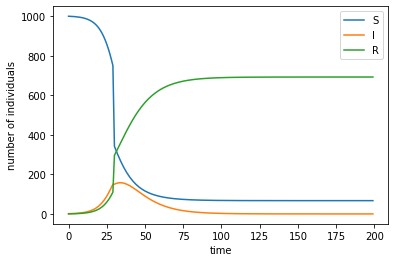

In [65]:
S = 1000
I = 1
R = 0
beta = 0.3
gamma = 0.1
steps = 200
vaccinationtime = 30
vaccinationquantity = 0.3

vaccinationdata = []


for i in range(steps):
  if i == vaccinationtime:
    v = vaccinationquantity
  else:
    v = 0
  S, I, R = vaccination(S, I, R, beta, gamma, v)
  vaccinationdata.append([S, I, R])

plt.plot(vaccinationdata)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R'))
plt.show()

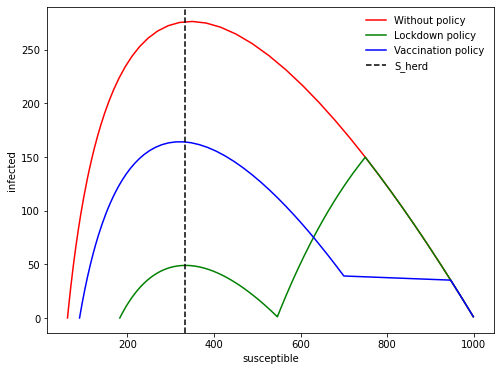

In [22]:
S_w = 999
S_l = 999
S_v = 999
I_w = 1
I_l = 1
I_v = 1
R_w = 0
R_l = 0
R_v = 0
beta = 0.3
gamma = 0.1
steps = 500
lockdownstart = 30
lockdowntime = 100
lockdownstrength = 0.3
vaccinationtime = 20
vaccinationquantity = 0.25

S_herd = (S_w + I_w + R_w)*gamma/beta

vaccinationi = []
vaccinations = []
lockdowns = []
lockdowni = []
basics = []
basici = []
udata = []

for i in range(steps):
  if i < lockdownstart:
    u = 1
  else:
    if i > lockdownstart + lockdowntime:
      u = 1
    else:
      u = lockdownstrength
  udata.append([u])
  S_l, I_l, R_l = lockdown(S_l, I_l, R_l, beta, gamma, u)
  lockdowns.append([S_l])
  lockdowni.append([I_l])

  S_w, I_w, R_w = basic(S_w, I_w, R_w, beta, gamma)
  basics.append([S_w])
  basici.append([I_w])

  if i == vaccinationtime:
    v = vaccinationquantity
  else:
    v = 0
  S_v, I_v, R_v = vaccination(S_v, I_v, R_v, beta, gamma, v)
  vaccinations.append([S_v])
  vaccinationi.append([I_v])



fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(basics, basici, color="red", label="Without policy")
ax.plot(lockdowns, lockdowni, color="green", label="Lockdown policy")
ax.plot(vaccinations, vaccinationi, color="blue", label="Vaccination policy")
#plt.vlines(333, 0, 300, color='black', linestyles='solid', label='', *, data=None, **kwargs)
plt.axvline(x=S_herd, color='k', linestyle='--', label= "S_herd")

plt.legend(loc="upper right", title="", frameon=False)
plt.xlabel('susceptible')
plt.ylabel('infected')

plt.show()